In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:

# Define the growth rate function
def calculate_growth_rate(current_time, base_growth_rate, max_growth_rate, growth_steepness, growth_inflection_point):
    growth_factor = 1 / (1 + np.exp(-growth_steepness * (current_time - growth_inflection_point)))
    rate = base_growth_rate + (max_growth_rate - base_growth_rate) * growth_factor
    
    # Add random noise (10% standard deviation)
    noise = np.random.normal(0, rate * 0.1)
    return max(0, rate + noise)

# Simulate network growth over time
def simulate_network_growth(total_population, base_growth_rate, max_growth_rate, growth_steepness, growth_inflection_point, time_steps=300):
    remaining = total_population
    total_nodes = 0
    node_counts = []

    for t in range(time_steps):
        growth_rate = calculate_growth_rate(t, base_growth_rate, max_growth_rate, growth_steepness, growth_inflection_point)
        pop_factor = remaining / total_population
        new_nodes = np.random.poisson(growth_rate * pop_factor)
        new_nodes = min(new_nodes, remaining)

        total_nodes += new_nodes
        remaining -= new_nodes
        node_counts.append(total_nodes)

        if remaining <= 0:
            break

    return node_counts

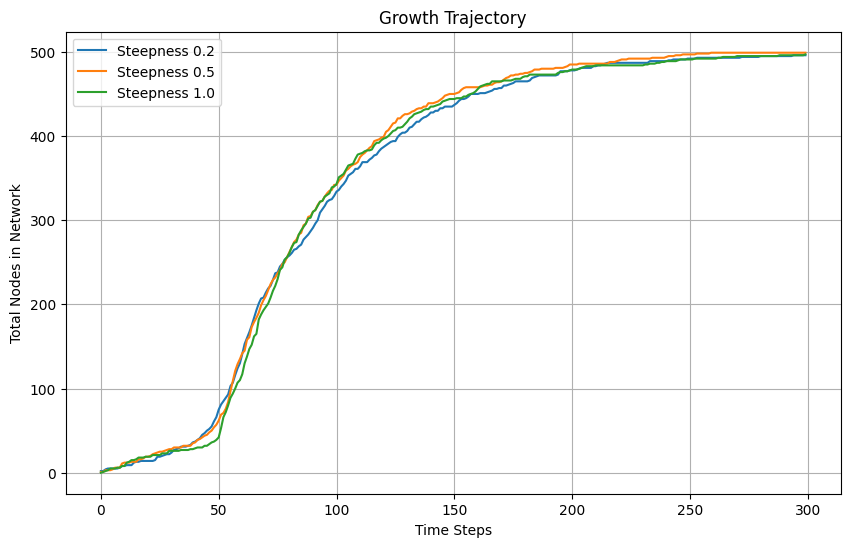

In [14]:

# Parameter configurations
configs = [
    {"base_growth_rate": 1, "max_growth_rate": 10, "growth_steepness": 0.2, "growth_inflection_point": 50},
    {"base_growth_rate": 1, "max_growth_rate": 10, "growth_steepness": 0.5, "growth_inflection_point": 50},
    {"base_growth_rate": 1, "max_growth_rate": 10, "growth_steepness": 1.0, "growth_inflection_point": 50},
]

total_population = 500
time_steps = 300  # Extended time window

# Plot the results
plt.figure(figsize=(10, 6))

for config in configs:
    node_counts = simulate_network_growth(
        total_population,
        config["base_growth_rate"],
        config["max_growth_rate"],
        config["growth_steepness"],
        config["growth_inflection_point"],
        time_steps
    )
    plt.plot(node_counts, label=f"Steepness {config['growth_steepness']}")

plt.xlabel("Time Steps")
plt.ylabel("Total Nodes in Network")
plt.title("Growth Trajectory")
plt.legend()
plt.grid()
plt.show()
